In [1]:
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm


In [2]:
df = pd.read_csv('Data/_predictive_maintenance.csv')

In [3]:
sns.set_theme(palette='tab10',
              font='Arial',
              font_scale=1.5,
              rc=None)


matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df.head(10)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
5                    1425         41.9               11       0   No Failure  
6                    1558         42.4               14       0   No Failure  
7                    1527         40.2               16       0   No Failure  
8                    1667         28.6               18       0   No Failure  
9                    1741         28.0               21       0   No Failure

In [6]:
df.tail(10)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
9990   9991     L57170    L                298.8                    308.5   
9991   9992     M24851    M                298.9                    308.4   
9992   9993     L57172    L                298.8                    308.4   
9993   9994     L57173    L                298.8                    308.4   
9994   9995     L57174    L                298.8                    308.3   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
9990                    1527         36.2                3       0   
9991                    1827         26.1                5       0   
9992                    1484         39.2                8       0   
9993                    1401         47.3               10       0   
9994                    1634         27.9               12       0   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
9990   No Failure  
9991   No Failure  
9992   No Failure  
9993   No Failure  
9994   No Failure  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure

In [7]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [8]:
df.drop_duplicates(inplace=True)
df = df.drop(["UDI"],axis=1)

In [9]:
pandas_profiling = ProfileReport(df, title="Predictive Maintenance Profiling Report")


In [10]:
pandas_profiling.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.033900  
std        9.968934        63.654147      0.180981  
min        3.800000         0.000000      0.000000  
25%       33.200000        53.000000      0.000000  
50%       40.100000       108.000000      0.000000  
75%       46.800000       162.000000      0.000000  
max       76.600000       253.000000      1.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 703.3+ KB


In [13]:
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [14]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

Product ID Type  Air temperature [°C]  Process temperature [°C]  \
8631     H38045    H                 25.15                     36.15   
7842     L55022    L                 27.95                     39.35   
5804     L52984    L                 29.35                     38.75   
6535     H35949    H                 29.05                     38.35   
6971     M21831    M                 28.55                     38.85   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
8631                    1506         37.0               54       0   
7842                    1659         31.1              203       0   
5804                    1365         46.5              172       0   
6535                    1505         43.6               78       0   
6971                    1559         42.8              121       0   

     Failure Type  Temperature difference [°C]  
8631   No Failure                         11.0  
7842   No Failure                         11.4  
5804   No Failure                          9.4  
6535   No Failure                          9.3  
6971   No Failure                         10.3

In [15]:
df.describe().style.background_gradient(cmap="magma")

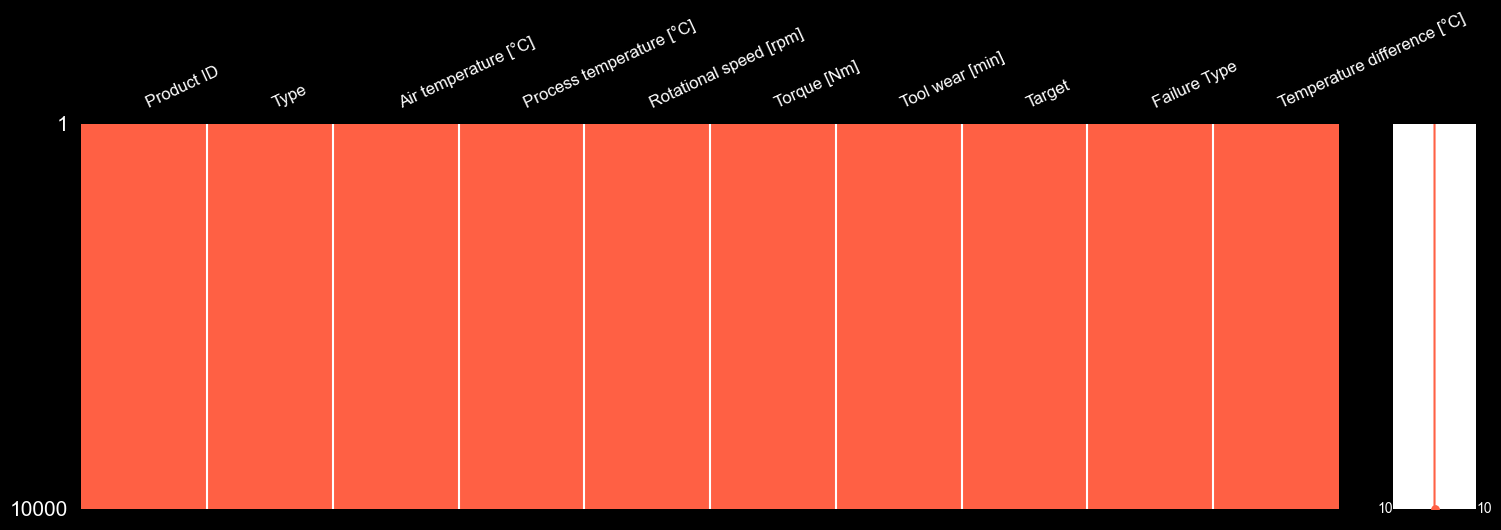

In [16]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

In [17]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

In [18]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

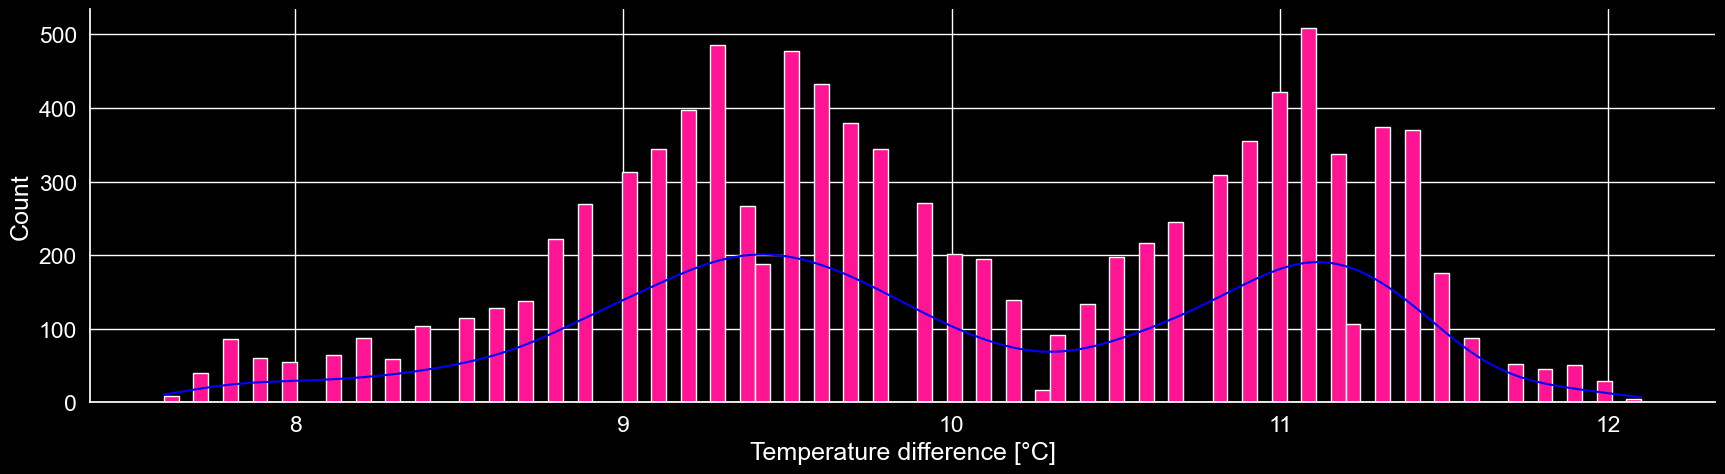

In [19]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

In [20]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


In [21]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');


In [22]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

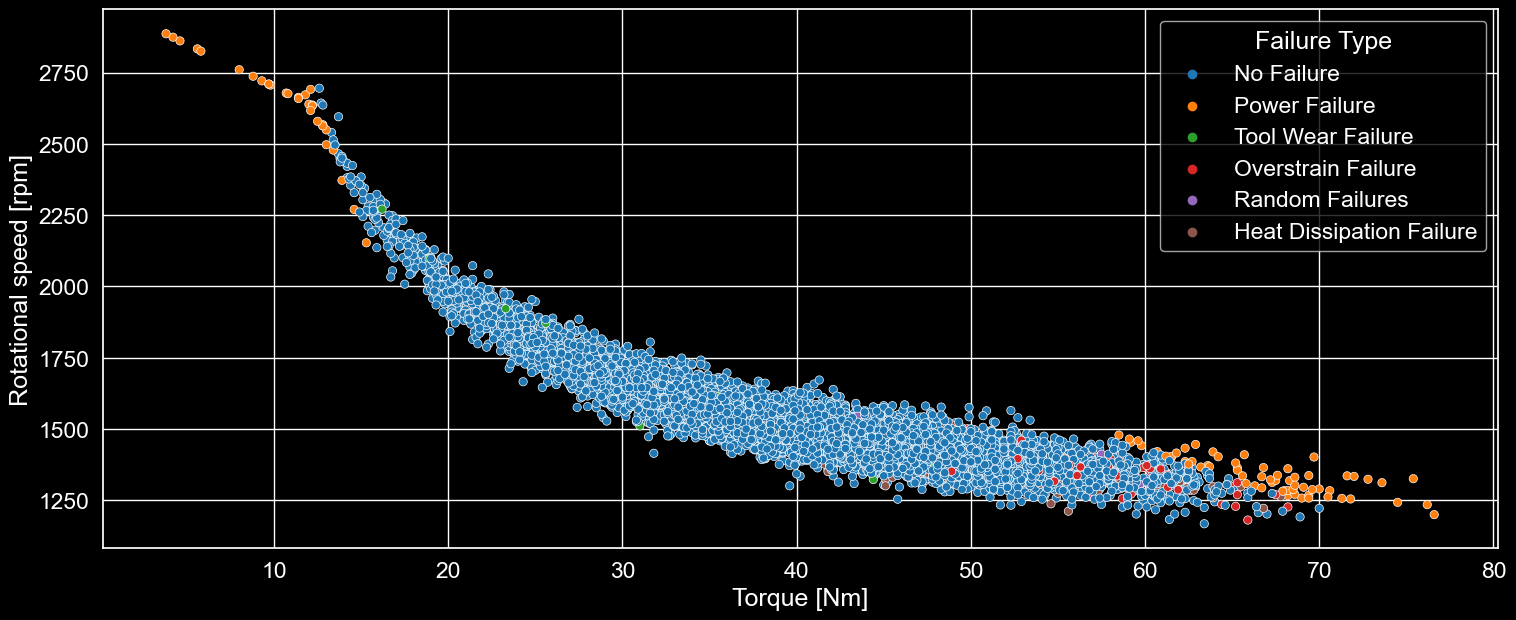

In [23]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

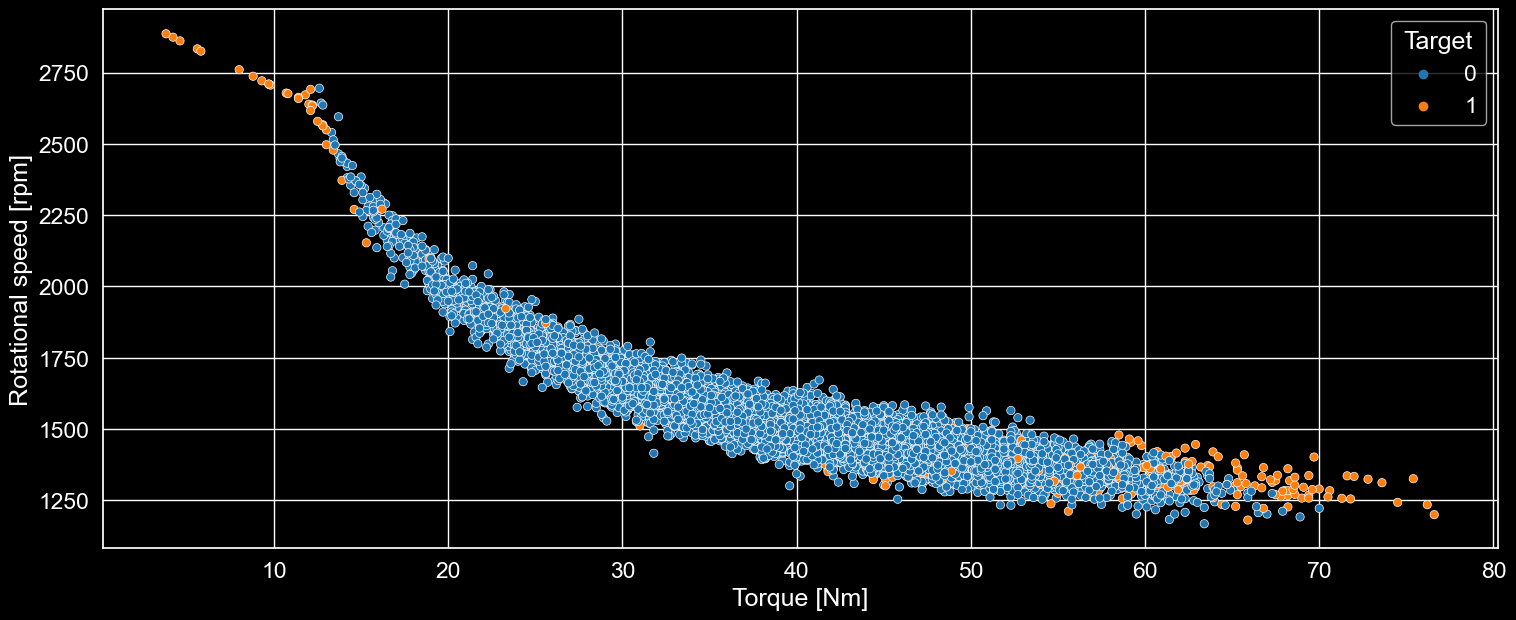

In [24]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

In [25]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [26]:
df.head(2)

Product ID Type  Air temperature [°C]  Process temperature [°C]  \
0     M14860    M                 25.95                     36.45   
1     L47181    L                 26.05                     36.55   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                    1551         42.8                0       0   No Failure   
1                    1408         46.3                3       0   No Failure   

   Temperature difference [°C]  
0                         10.5  
1                         10.5

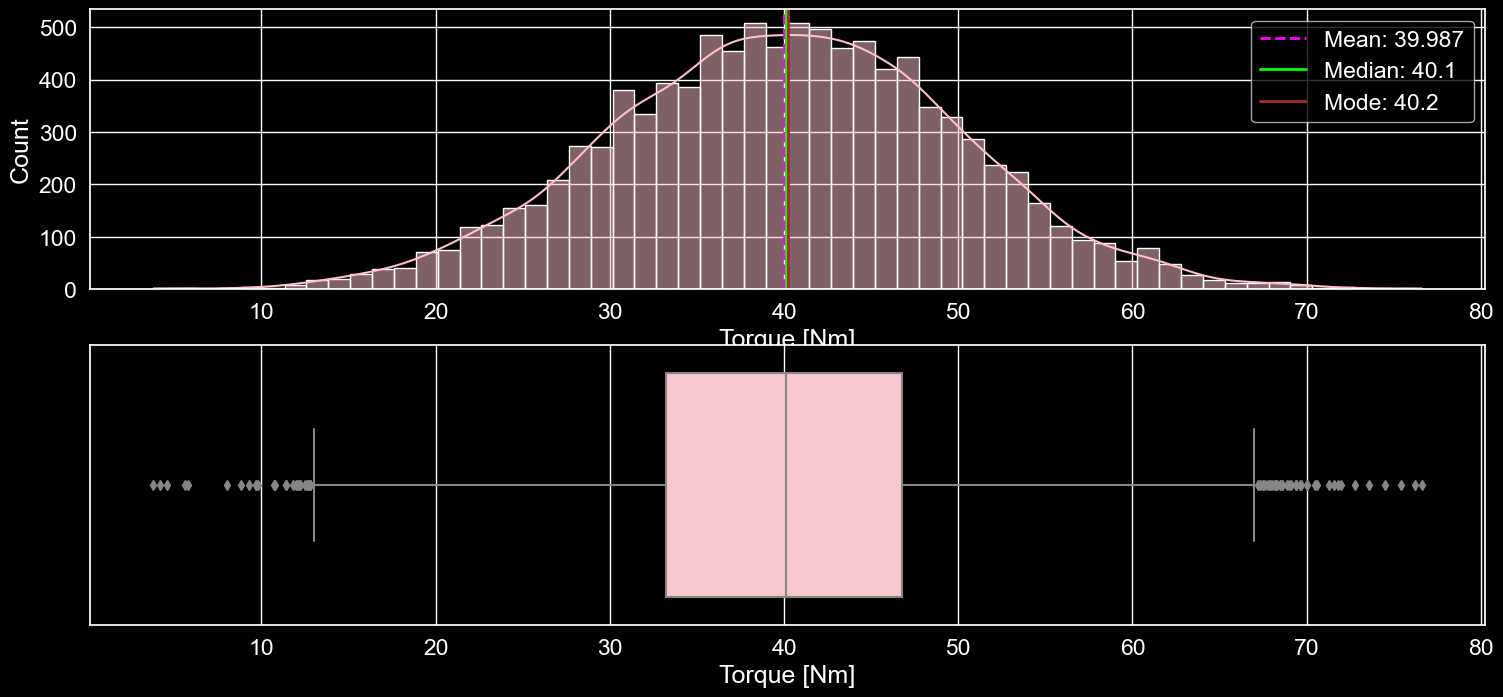

In [27]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

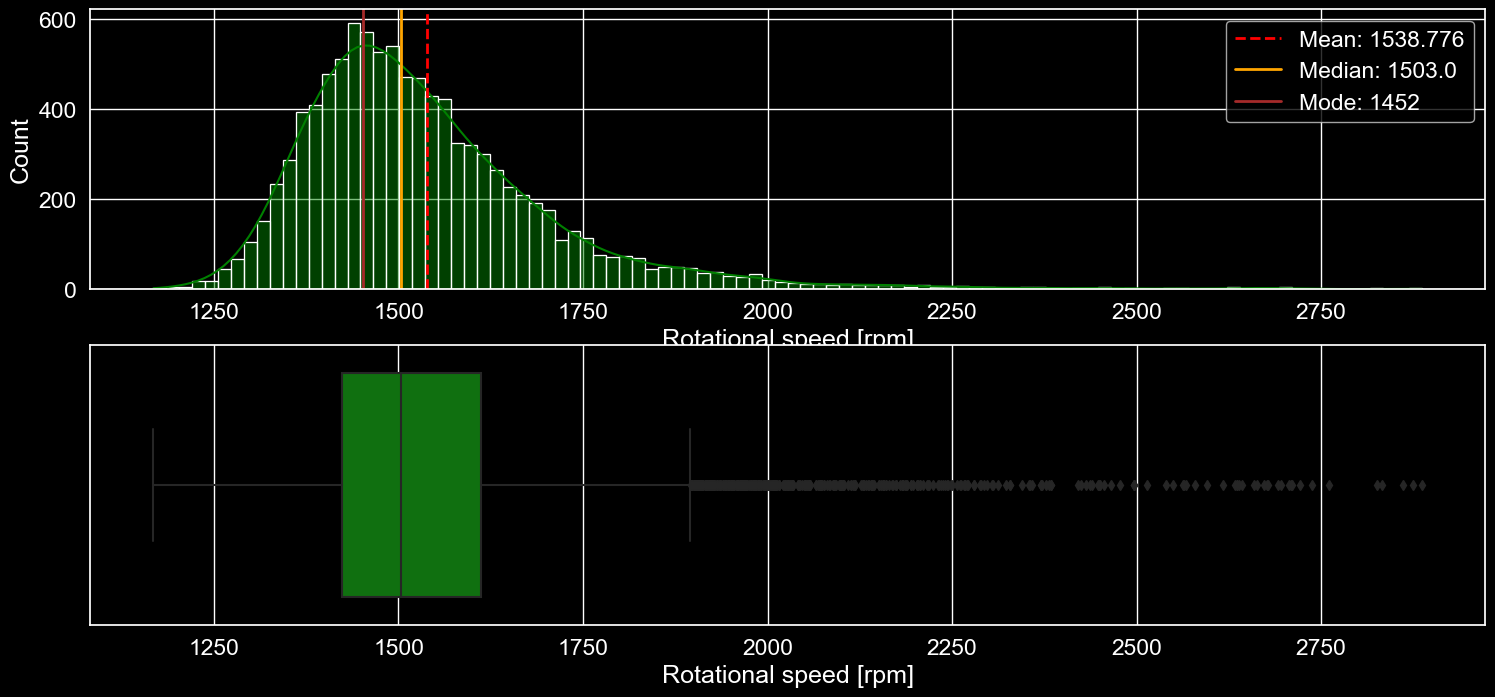

In [28]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

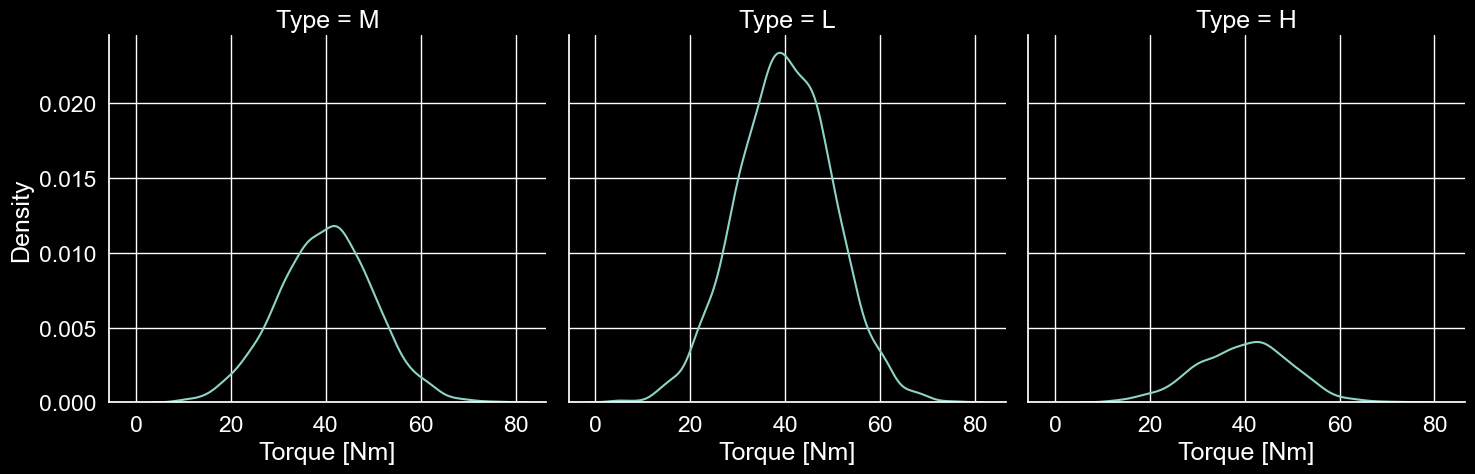

In [29]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

In [30]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

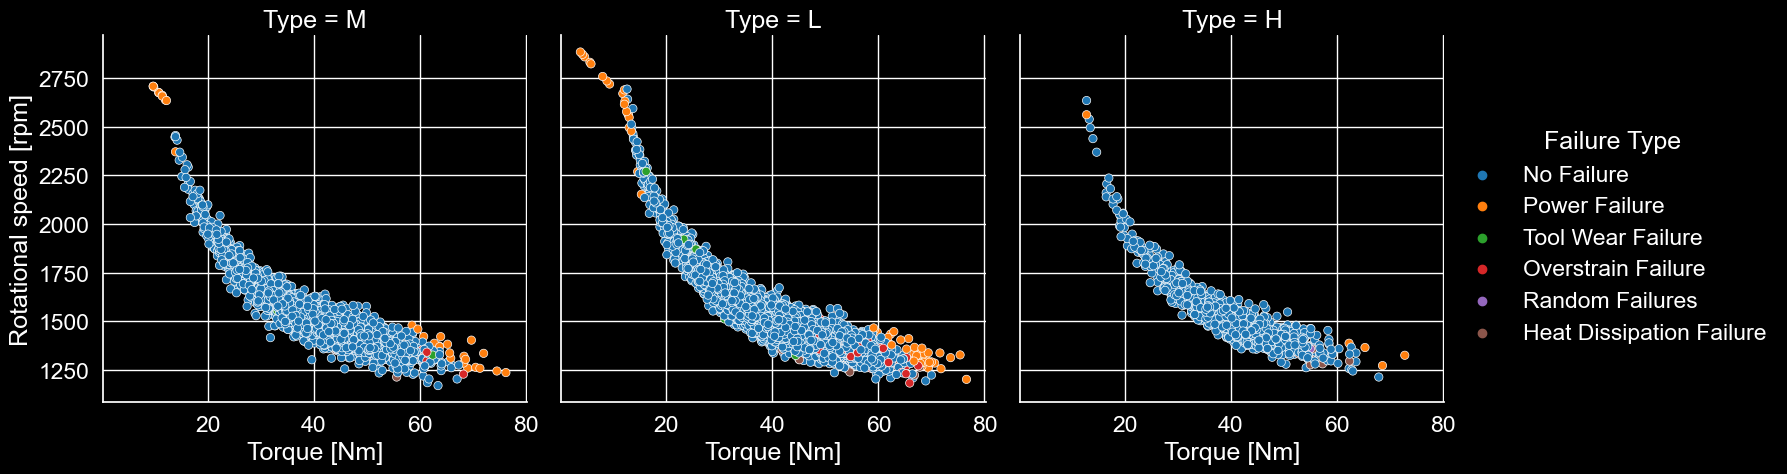

In [31]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

Feature Extraction

In [32]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

Product ID  Type  Air temperature [°C]  Process temperature [°C]  \
0     M14860     1                 25.95                     36.45   
1     L47181     2                 26.05                     36.55   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  \
0                    1551         42.8                0       0             1   
1                    1408         46.3                3       0             1   

   Temperature difference [°C]  
0                         10.5  
1                         10.5

In [33]:
df.drop(["Product ID"],axis=1,inplace=True)

In [34]:
df.head(10)

Type  Air temperature [°C]  Process temperature [°C]  \
0     1                 25.95                     36.45   
1     2                 26.05                     36.55   
2     2                 25.95                     36.35   
3     2                 26.05                     36.45   
4     2                 26.05                     36.55   
5     1                 25.95                     36.45   
6     2                 25.95                     36.45   
7     2                 25.95                     36.45   
8     1                 26.15                     36.55   
9     1                 26.35                     36.85   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  \
0                    1551         42.8                0       0             1   
1                    1408         46.3                3       0             1   
2                    1498         49.4                5       0             1   
3                    1433         39.5                7       0             1   
4                    1408         40.0                9       0             1   
5                    1425         41.9               11       0             1   
6                    1558         42.4               14       0             1   
7                    1527         40.2               16       0             1   
8                    1667         28.6               18       0             1   
9                    1741         28.0               21       0             1   

   Temperature difference [°C]  
0                         10.5  
1                         10.5  
2                         10.4  
3                         10.4  
4                         10.5  
5                         10.5  
6                         10.5  
7                         10.5  
8                         10.4  
9                         10.5

In [35]:
df["Failure Type"].value_counts()

Failure Type
1    9652
6     112
2      95
4      78
3      45
5      18
Name: count, dtype: int64

In [36]:
df["Target"].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [37]:
df["Type"].value_counts()

Type
2    6000
1    2997
3    1003
Name: count, dtype: int64

In [38]:
df.rename(columns={"Type": "Machine Type"}, inplace=True)


In [39]:
X = df.drop(["Target"],axis=1)
y = pd.DataFrame(df["Target"])

In [40]:
X.head(5)

Machine Type  Air temperature [°C]  Process temperature [°C]  \
0             1                 25.95                     36.45   
1             2                 26.05                     36.55   
2             2                 25.95                     36.35   
3             2                 26.05                     36.45   
4             2                 26.05                     36.55   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Failure Type  \
0                    1551         42.8                0             1   
1                    1408         46.3                3             1   
2                    1498         49.4                5             1   
3                    1433         39.5                7             1   
4                    1408         40.0                9             1   

   Temperature difference [°C]  
0                         10.5  
1                         10.5  
2                         10.4  
3                         10.4  
4                         10.5

In [41]:
y.head(5)   

Target
0       0
1       0
2       0
3       0
4       0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from itertools import count
from imblearn.over_sampling import RandomOverSampler


print(len(y_train[y_train["Target"]==0]))
print(len(y_train[y_train["Target"]==1]))

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

7722
278


In [44]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [45]:

print(len(y_over[y_over["Target"]==0]))
print(len(y_over[y_over["Target"]==1]))
print(len(X_over))



7722
7722
15444


In [52]:


model = svm.SVC()
model.fit(X_over, y_over)

SVC()

In [53]:
predictions = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1939
           1       0.12      0.84      0.21        61

    accuracy                           0.80      2000
   macro avg       0.56      0.82      0.55      2000
weighted avg       0.97      0.80      0.87      2000



In [63]:
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[1558  381]
 [  10   51]]


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Accuracy Score ", accuracy_score(y_test, predictions))
print("Precision Score ", precision_score(y_test, predictions))
print("Recall Score ", recall_score(y_test, predictions))
print("F1 Score ", f1_score(y_test, predictions))

Accuracy Score  0.8045
Precision Score  0.11805555555555555
Recall Score  0.8360655737704918
F1 Score  0.20689655172413793


In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1939
           1       0.12      0.84      0.21        61

    accuracy                           0.80      2000
   macro avg       0.56      0.82      0.55      2000
weighted avg       0.97      0.80      0.87      2000



In [68]:
from sklearn.model_selection import cross_val_score 



clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X_over, y_over, cv=5)


In [70]:
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.98931693 0.9867271  0.98769828 0.98640337 0.98445596]
0.99 accuracy with a standard deviation of 0.00


In [77]:
from sklearn.model_selection import GridSearchCV
parameters = GridSearchCV(estimator=clf, param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}, cv=5)

In [78]:
best_parameters = parameters.fit(X_over, y_over)  

In [79]:
print(best_parameters.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [81]:
model_1 = svm.SVC(kernel='linear', C=0.1, random_state=42)
model_1.fit(X_over, y_over)
predictions_1 = model_1.predict(X_test)

In [83]:
print(classification_report(y_test, predictions_1))
print(confusion_matrix(y_test, predictions_1))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.91      0.97      0.94        61

    accuracy                           1.00      2000
   macro avg       0.95      0.98      0.97      2000
weighted avg       1.00      1.00      1.00      2000

[[1933    6]
 [   2   59]]


[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


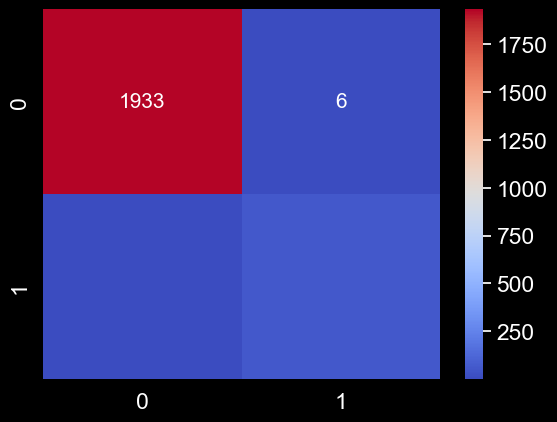

In [86]:
y_test_numpy = np.array(y_test).shape
seaborn = sns.heatmap(confusion_matrix(y_test, predictions_1), annot=True, cmap='coolwarm', fmt='d')
print(y_test_numpy)